In [22]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
root = '/Volumes/Festplatte/data-UA/'
data_path = root + 'data/'
president = 'trump'
cities = ['Birmingham', 'LA', 'London', 'NYC']
years = [str(year) for year in range(2018, 2023)] # ['2018', '2019', '2020', '2021', '2022']
boris_johnson_hashtags = ('BorisJohnson', 'UKPrimeMinister', 'ToryLeader', 'Boris')
donald_trump_hashtags = ('DonaldTrump', 'Trump2024', 'MakeAmericaGreatAgain', 'Trump')
president_hashtags = donald_trump_hashtags if president == 'trump' else boris_johnson_hashtags
def get_files(dir):
    """ get all files from a directory 
    that do not start with a '.'
    :param dir: String
    :return: List of Strings
    """
    return sorted([s for s in os.listdir(dir) if not s.startswith('.')])

In [24]:
# create columns
months = range(1, 13)
formatted_dates = [f'{year}-{month:02d}' for year in years for month in months]

In [25]:
def get_compound_sentiment(president):
    compound_sentiment = pd.DataFrame(index=cities, columns=formatted_dates)
    compound_col = 'Compound'
    for db_file in get_files(f'{data_path}{president}/'):
        # get date in the format YYYY-MM
        date_only = db_file[-11:-4]
        # load data
        data = pd.read_pickle(f'{data_path}{president}/{db_file}')
        # check if data has respective column
        assert compound_col in data.columns
        city = db_file.split('-')[0]
        # check if the city was extracted correctly
        assert city in cities
        # save the monthly compounded graded sentiment scoring in the compound_sentiment overview
        compound_sentiment.at[city, date_only] = data[compound_col].mean()
    # save data
    compound_sentiment.to_pickle(f'{data_path}{president}_compound_sentiment.pkl')
    return compound_sentiment

In [26]:
presidents = ['trump', 'johnson']
trump_compound_sentiment = get_compound_sentiment(presidents[0])
johnson_compound_sentiment = get_compound_sentiment(presidents[1])

In [27]:
president = 'trump'
db_file = get_files(f'{data_path}{president}/')[0]
trump = pd.read_pickle(f'{data_path}trump/{db_file}')
johnson = pd.read_pickle(f'{data_path}johnson/{db_file}')

In [33]:
def plot(data, indexes, president, filename):
    plt.figure(figsize=(14, 8))
    mpl.rcParams['font.family'] = 'sans-serif' #'serif'
    # Plot each dimension
    colors = ['#910830', '#BFBFBF', '#6D0624', '#5E5E5D']
    for i in range(len(indexes)):
        plt.plot(data.loc[indexes[i]], label=indexes[i], color=colors[i])

    # Adding titles and labels
    plt.title(f'Compounded Sentiment Scoring about {president.capitalize()} on Twitter')
    # plt.xlabel('Date')
    plt.ylabel('Compounded Sentiment Scoring')

    plt.xticks(data.columns[5::12])

    # Adding a legend
    plt.legend() #loc='upper left'
    plt.grid(color='gray', linestyle='-.', linewidth=.5)
    limit = 0.3
    plt.xlim(limit)
    alpha = .1
    plt.axhspan(0, limit, facecolor='green', alpha=alpha)
    plt.axhspan(0, limit*-1, facecolor='red', alpha=alpha)
    # Display the plot
    plt.savefig(f'visualizations/compounded_sentiment_scoring_{president}-{filename}.png')
    plt.show()

In [34]:
early_cols = trump_compound_sentiment.columns[:7]
late_cols = trump_compound_sentiment.columns[-6:]
del_cols = early_cols.append(late_cols)
del early_cols, late_cols
trump_compound_sentiment = trump_compound_sentiment.drop(columns=del_cols)
johnson_compound_sentiment = johnson_compound_sentiment.drop(columns=del_cols)

# remove the month info from the df column, because it looks better in the graph without this info
trump_compound_sentiment.columns = trump_compound_sentiment.columns.str.replace('-01', '', regex=False)
johnson_compound_sentiment.columns = johnson_compound_sentiment.columns.str.replace('-01', '', regex=False)

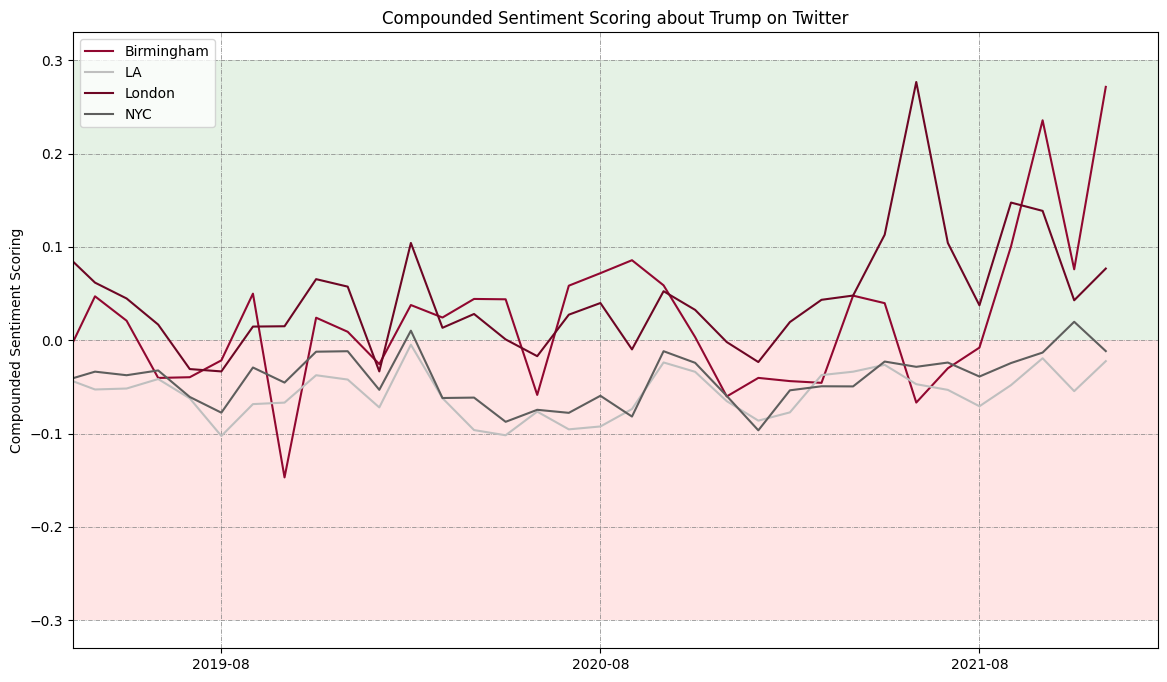

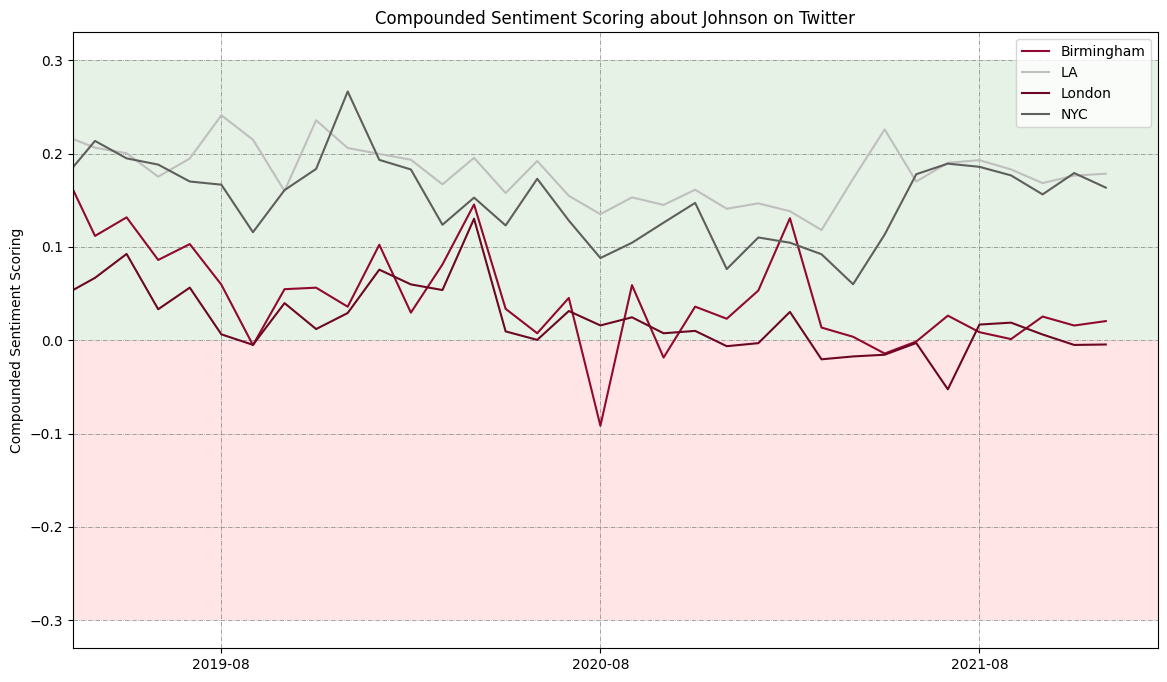

In [35]:
plot(trump_compound_sentiment, cities, presidents[0], 'cities')
plot(johnson_compound_sentiment, cities, presidents[1], 'cities')

In [36]:
# group by country
# for simplicity reasons the average is used to combine the columns of the English and American cities
trump_compound_sentiment_countries = pd.DataFrame(columns=trump_compound_sentiment.columns)
trump_compound_sentiment_countries.loc['England'] = trump_compound_sentiment.loc[['Birmingham', 'London']].mean()
trump_compound_sentiment_countries.loc['USA'] = trump_compound_sentiment.loc[['LA', 'NYC']].mean()
# group by country
# for simplicity reasons the average is used to combine the columns of the English and American cities
johnson_compound_sentiment_countries = pd.DataFrame(columns=johnson_compound_sentiment.columns)
johnson_compound_sentiment_countries.loc['England'] = johnson_compound_sentiment.loc[['Birmingham', 'London']].mean()
johnson_compound_sentiment_countries.loc['USA'] = johnson_compound_sentiment.loc[['LA', 'NYC']].mean()

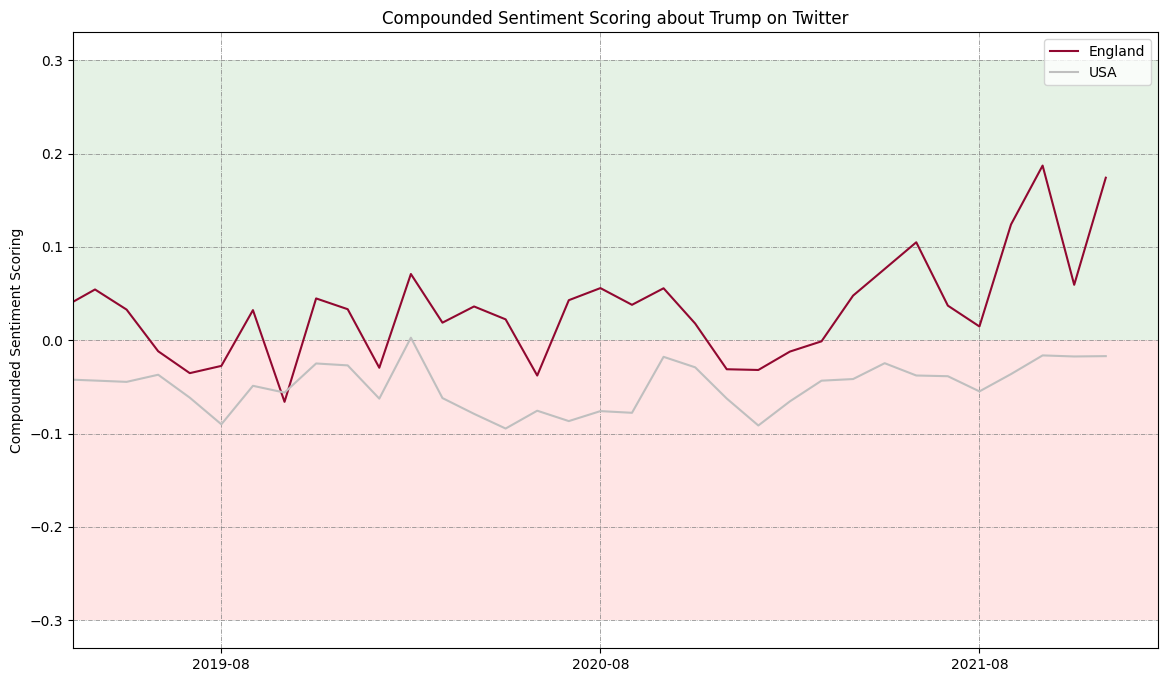

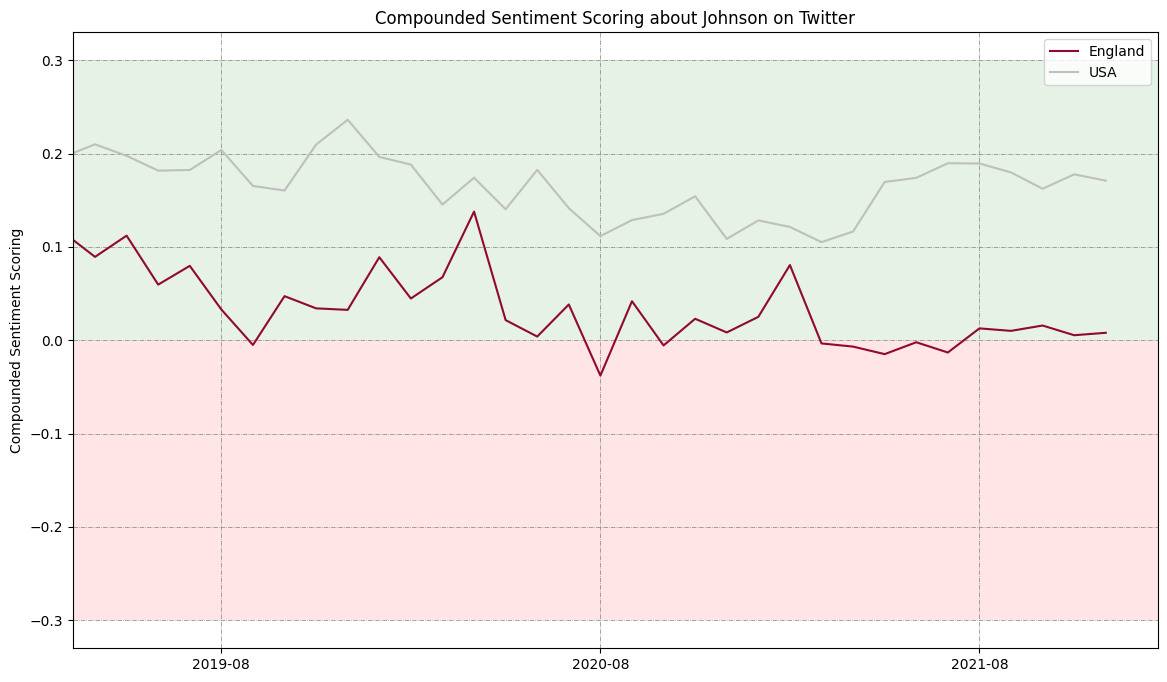

In [37]:
plot(trump_compound_sentiment_countries, ['England', 'USA'], presidents[0], 'countries')
plot(johnson_compound_sentiment_countries, ['England', 'USA'], presidents[1], 'countries')